
Привет, меня зовут Головатский Николай, я буду проверять твой проект.

В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их,** это может усложнить и затянуть повторную проверку. 

Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Если все сделано хорошо.</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Некритичное замечание, реккомендация на будущее. Для принятия проекта исправление не обязательно.</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Критичная ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Hello World!
</div>

Если писать особо нечего, просто оставляй комментарий с галочкой ☑️.

<div class="alert alert-block alert-success">
<b>Общее впечатление:</b> 
    
- Спасибо за работу :)
- Определенно могу сказать, что проект очень сильный;
- Мне очень понравилось, как ты детально погружаешься в данные и не упускаешь никаких мелочей;
- В проекте осталось пара моментов, после правки которых, я смогу принять работу😉
    
</div>

# Исследование надежности заемщиков.

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> На этом этапе было бы неплохо описать суть проекта. Краткое введение делает проект понятней и помогает ориентироваться
</div>

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Другое дело🔥 </div>

### Шаг 1. Обзор данных

In [1]:
import pandas as pd
try:
    df = pd.read_csv('/Users/alex/Desktop/питон/data/data_2.csv')
except:
    df = pd.read_csv('/datasets/data.csv')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


None

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Код выдает ошибку. Тебе нужно обработать путь к файлу. Сейчас ты обращаешься к файлу на твоей локальной машине, чтобы код отработал на другой машине, необходимо обратиться к файлу по тому пути, который указан в задании.
    
Также ты можешь использовать конструкцию try except, которая в случае ошибки чтения с локальной машины, будет читать файл по пути из задания.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> допилил чтение файла с вэб-приложения при помощи контрукции try/except</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Отличная работа🔥 </div>

#В столбцах 'days_employed' и 'total_income ' присутствуют пропуски, тип данных обоих столбцов float64

#Названия столбцов написаны по-змеинному верно

### Шаг 2.1 Заполнение пропусков

In [2]:
display(df[['days_employed','total_income']]) # Вывод столбцов с пропусками
days_employed_na = (df['days_employed'].isna().sum())/(df['days_employed'].count())# Расчет доли пропусков в солбце "days_employed"
total_income_na = (df['total_income'].isna().sum())/(df['total_income'].count())# Расчет доли пропусков в солбце "total_income"
display(f'Пропусков в солбце "days_employed": {days_employed_na:.0%}')# Вывод количества пропусков в солбце "days_employed" в процентах
display(f'Пропусков в солбце "total_income": {total_income_na:.0%}')# Вывод количества пропусков в солбце "total_income" в процентах 

,days_employed,total_income
0,-8437.673028,253875.639453
1,-4024.803754,112080.014102
2,-5623.422610,145885.952297
3,-4124.747207,267628.550329
4,340266.072047,158616.077870
...,...,...
21520,-4529.316663,224791.862382
21521,343937.404131,155999.806512
21522,-2113.346888,89672.561153
21523,-3112.481705,244093.050500


'Пропусков в солбце "days_employed": 11%'

'Пропусков в солбце "total_income": 11%'

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Лучше оставлять свои комментарии в ячейках Markdown, так их намного проще читать</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Про комментарии уяснил, в следующем проекте исправлюсь! А пока нужно наверстывать отставание.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> 😉 </div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Молодец👍 Долю пропусков можно посмотреть так - df.isna().mean() 😉</div>

2174
401755.40047533
-18388.949900568383
-1203.369528770489


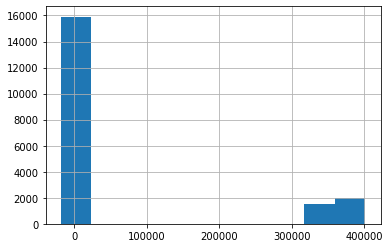

In [3]:
print(df['days_employed'].isna().sum())#Количество пропусков в столбце "days_employed"
print(df['days_employed'].max())#Максимальное значение в столбце "days_employed"
print(df['days_employed'].min())#Минимальное значение в столбце "days_employed"
print(df['days_employed'].median())#Медианное значение столбца "days_employed"
hist_plot1 = df['days_employed'].hist()#Гистограмма
fig1 = hist_plot1.get_figure()

2174
2265604.028722744
20667.26379327158
145017.93753253992


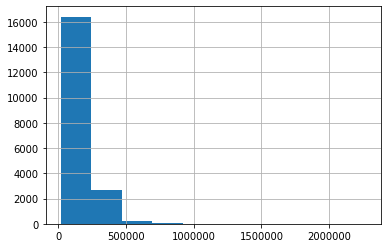

In [4]:
print(df['total_income'].isna().sum())#Количество пропусков в столбце "total_income"
print(df['total_income'].max())#Максимальное значение в столбце "total_income"
print(df['total_income'].min())#Минимальное значение в столбце "total_income"
print(df['total_income'].median())#Медианное значение столбца "total_income"
hist_plot2 = df['total_income'].hist()#Гистограмма
display(hist_plot2)



<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Для изучения распределения количественного столбца подойдет метод describe()

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Дак в этом спринте еще небыло вроде describe потому и не применял. В следующем проекте обязательно буду использовать.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Просто советую на будущее😉 </div>

В столбце 'days_employed' (трудовой стаж) мы видим большое количество отрицательных значений, что явно является ошибкой, так как трудовой стаж отрицательным быть не может. Из-за того, что количество отрицательных значений составляет 5/6 от всех значений человеческий фактор можно исключить. Соответственно, ошибка скорей всего техническая.

Заполнять медианным значением количественные переменные лучше всеге из-за того, что при наличии в датасете значений сильно превышающих по размеру значения чем основная масса среднее арифметическое будет недостоверным, а медиана будет той же потому что на выбросы на ней не отражаются.

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> 
Есть еще один, более интересный способ заполнения пропусков. Например, доход клиента (total_income) можно заполнить медианными значениями в разрезе income_type - для каждого income_type посчитать медианный total_income и заполнить пропуски ими. Так мы не усредним данные и меньше повлияем на распределение)

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Это тоже только прошел в следующем спринте. Пока еще не особо хорошо уяснил из теории этот подход, на практике в следующем проекте буду разбираться..

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> 😉😉😉</div>

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [5]:
print(df['gender'].unique())
print(df.describe())
print(df[df['days_employed'] > 100000].count())#Глядя на гистаграмму видно, что основная часть значени находится в диапазоне от -15000 до +15000, выведем количество выбросов 
df['days_employed'] = df['days_employed'].apply(abs)
df['children'] = df['children'].apply(abs)#устраняем отрицательные значения
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())#Заполняем медианным значением пропуски в столбце 'days_employed' 
df['total_income'] = df['total_income'].fillna(df['total_income'].median())#Заполняем медианным значением пропуски в столбце 'total_income'

print(df[['days_employed','total_income']].head(20)) #Выводим первые 20 значений обоих столбцов

['F' 'M' 'XNA']
           children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   63046.497661     43.293380      0.817236   
std        1.381587  140827.311974     12.574584      0.548138   
min       -1.000000  -18388.949901      0.000000      0.000000   
25%        0.000000   -2747.423625     33.000000      1.000000   
50%        0.000000   -1203.369529     42.000000      1.000000   
75%        1.000000    -291.095954     53.000000      1.000000   
max       20.000000  401755.400475     75.000000      4.000000   

       family_status_id          debt  total_income  
count      21525.000000  21525.000000  1.935100e+04  
mean           0.972544      0.080883  1.674223e+05  
std            1.420324      0.272661  1.029716e+05  
min            0.000000      0.000000  2.066726e+04  
25%            0.000000      0.000000  1.030532e+05  
50%            0.000000      0.000000  1.450179e+05  
75%        

In [6]:
print(df['children'].unique())
df['children'] = df['children'].where(df['children'] < 10, 2)
print(df['children'].unique())

[ 1  0  3  2  4 20  5]
[1 0 3 2 4 5]


3445 значений сильно превышающие по размеру основную массу, причиной их появления мог стать человеческий фактор, например неправильные  единицы измерения.

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Нехватает изучения аномалий в столбцах:
    
- children 

- dob_years (столбец не участвует в исследовании, но проверить на аномалии стоит, исправлять аномалии не обязательно)

- education (вижу, что обработал аномалии далее, так что добавлять не обязательно)

- gender (столбец не участвует в исследовании, но проверить на аномалии стоит, исправлять аномалии не обязательно)

Добавь пожалуйста😉</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Применил метод describe ко всему датасету из которого видно следующие аномалии:
    
    1.В столбце dob_years - присутствует 0, скорей всего просто не указали данные
    
    2. В столбце children - присутствуют значения "-1" и "20". Отрицательно значение появилось скорей всего из-за технической ошибки, ну или человеческий фактор, например "дефис 1" приняли как "минус 1".
    
    3.gender - присутствует значение 'XNA', как оно появилось нужно уточнять, вероятнее всего это человеческий фактор, а именно описка при заполнении.

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера_v2❌:</b> С описанием аномалий согласен. dob_years и gender не участвуют в исследовании, их можно не трогать, но столбец children нужно исправить. -1 можно заменить на 1, аномалии с 20 детьми так же нужно исправить, например заменить на 2.</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Готово, минус удалил при помощи abs сразу после такого же куска кода для столбца dayz_employed, а 20 поменял на 2 при помощи where, ну и проверял при помощи unique.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v3✅:</b> Согласен👍</div>

### Шаг 2.3. Изменение типов данных.

In [7]:
df['total_income'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Типы данных исправлены верно, но для их проверки лучше использовать методы info() или dtypes😉</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Добавил info

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> 🔥 </div>

### Шаг 2.4. Удаление дубликатов.

In [8]:
display(df.duplicated().sum())# Выводим количество явных дубликатов

54

In [9]:
df = df.drop_duplicates()#Удаляем дубликаты
display(df.duplicated().sum())#Проверяем удалились ли дубликаты

0

In [10]:
df['education'] = df['education'].str.lower()#Переводим значения столбца 'education' в нижний регистр
display(df.duplicated().sum())#Проверяем дубликаты после изменения регистра
df = df.drop_duplicates().reset_index(drop=True)#Удаляем дубликаты и сбрасываем индексы
display(df.duplicated().sum())#Выводим для проверки количество дубликатов

17

0

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Молодец, дубликаты удалены верно👍

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [11]:
education = df[['education_id','education']].drop_duplicates().reset_index(drop=True)#Создаем новый DataFrame со столбцами 'education_id' и 'education',убираем дубликаты и сбрасываем индексы
family_status = df[['family_status_id','family_status']].drop_duplicates().reset_index(drop=True)#Создаем новый DataFrame со столбцами 'family_status_id' и 'family_status',убираем дубликаты и сбрасываем индексы
df = df.drop(['education','family_status'],axis=1)#Удаляем из исходного датасета столбцы 'education','family_status'
df_education_merged = df.merge(education, on='education_id', how='left')# В задании ничего не сказано про перемещение обратно в исходный датафрейм, но в слаке наставник говорил об этом, на всякий случай не стал менять исходный датафрейм, а сделал в новом
df_family_status_merged = df.merge(family_status, on='family_status_id', how='left')# В задании ничего не сказано про перемещение обратно в исходный датафрейм, но в слаке наставник говорил об этом, на всякий случай не стал менять исходный датафрейм, а сделал в новом
display(df_education_merged,df_family_status_merged)#вывожу обьединенную таблицу для проверки
display(education,family_status)#вывожу словари для проверки

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,education
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,покупка жилья,высшее
1,1,4024.803754,36,1,0,F,сотрудник,0,112080.014102,приобретение автомобиля,среднее
2,0,5623.422610,33,1,0,M,сотрудник,0,145885.952297,покупка жилья,среднее
3,3,4124.747207,32,1,0,M,сотрудник,0,267628.550329,дополнительное образование,среднее
4,0,340266.072047,53,1,1,F,пенсионер,0,158616.077870,сыграть свадьбу,среднее
...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,1,1,F,компаньон,0,224791.862382,операции с жильем,среднее
21450,0,343937.404131,67,1,0,F,пенсионер,0,155999.806512,сделка с автомобилем,среднее
21451,1,2113.346888,38,1,1,M,сотрудник,1,89672.561153,недвижимость,среднее
21452,3,3112.481705,38,1,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,среднее


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,family_status
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,покупка жилья,женат / замужем
1,1,4024.803754,36,1,0,F,сотрудник,0,112080.014102,приобретение автомобиля,женат / замужем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885.952297,покупка жилья,женат / замужем
3,3,4124.747207,32,1,0,M,сотрудник,0,267628.550329,дополнительное образование,женат / замужем
4,0,340266.072047,53,1,1,F,пенсионер,0,158616.077870,сыграть свадьбу,гражданский брак
...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,1,1,F,компаньон,0,224791.862382,операции с жильем,гражданский брак
21450,0,343937.404131,67,1,0,F,пенсионер,0,155999.806512,сделка с автомобилем,женат / замужем
21451,1,2113.346888,38,1,1,M,сотрудник,1,89672.561153,недвижимость,гражданский брак
21452,3,3112.481705,38,1,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,женат / замужем


,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Лучше оставлять свои комментарии в ячейках Markdown, так их намного проще читать</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Сделано верно, молодец🔥

Присоединять обратно не требуется, так как присоединив значения обратно, мы по сути вернум таблицу df в исходный вид. Смысл этого шага в том, чтобы ты разобрался с таблицами словарями, научился их выделять и присоединять (присоединяем мы их далее, в пункте ответов на вопросы)😉</div>

### Шаг 2.6. Категоризация дохода.

In [12]:
def total_income_func(row):#Пишем функцию классификации и оборачиваем её в try/except для стабильной работы 
    try:
        if 0 < row <= 30000:
            return 'E'
        elif 30001 <= row <= 50000:
            return 'D'
        elif 50001 <= row <= 200000:
            return 'С'
        elif 200001 <= row <= 1000000:
            return 'B'
        elif row >= 1000001:
            return 'A'
    except:
        print('Доход меньше или равен 0')
    
    
df['total_income_category'] = df['total_income'].apply(total_income_func)#Создаем новый столбец в датафрейме при помощи вышенаписанной функции и метода apply()
display(df)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,покупка жилья,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080.014102,приобретение автомобиля,С
2,0,5623.422610,33,1,0,M,сотрудник,0,145885.952297,покупка жилья,С
3,3,4124.747207,32,1,0,M,сотрудник,0,267628.550329,дополнительное образование,B
4,0,340266.072047,53,1,1,F,пенсионер,0,158616.077870,сыграть свадьбу,С
...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,1,1,F,компаньон,0,224791.862382,операции с жильем,B
21450,0,343937.404131,67,1,0,F,пенсионер,0,155999.806512,сделка с автомобилем,С
21451,1,2113.346888,38,1,1,M,сотрудник,1,89672.561153,недвижимость,С
21452,3,3112.481705,38,1,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,B


In [13]:
display(df['purpose'].unique())

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> В функцию закралась ошибка, она неверно расставить категории, так как в коде они неверно указаны. Трижды указана категория D

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Поправил

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Теперь верно🔥 </div>

### Шаг 2.7. Категоризация целей кредита.

In [14]:
def purpose_def(row):
    
    try:
        purpose = row['purpose']
        if 'автомобил' in purpose: 
            return 'операции с автомобилем',
        elif 'жиль' in purpose or 'недвижим' in purpose:
            return'операции с недвижимостью',
        elif 'свадьб' in purpose:
            return'проведение свадьбы',
        elif 'образов' in purpose:
            return'получение образования'
    except:
        return('Внимание! Некорректный доход!')

df['purpose_category'] = df.apply(purpose_def, axis=1)
display(df.head(10))

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,покупка жилья,B,"(операции с недвижимостью,)"
1,1,4024.803754,36,1,0,F,сотрудник,0,112080.014102,приобретение автомобиля,С,"(операции с автомобилем,)"
2,0,5623.422610,33,1,0,M,сотрудник,0,145885.952297,покупка жилья,С,"(операции с недвижимостью,)"
3,3,4124.747207,32,1,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616.077870,сыграть свадьбу,С,"(проведение свадьбы,)"
5,0,926.185831,27,0,1,M,компаньон,0,255763.565419,покупка жилья,B,"(операции с недвижимостью,)"
6,0,2879.202052,43,0,0,F,компаньон,0,240525.971920,операции с жильем,B,"(операции с недвижимостью,)"
7,0,152.779569,50,1,0,M,сотрудник,0,135823.934197,образование,С,получение образования
8,2,6929.865299,35,0,1,F,сотрудник,0,95856.832424,на проведение свадьбы,С,"(проведение свадьбы,)"
9,0,2188.756445,41,1,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,С,"(операции с недвижимостью,)"


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Тут все верно, функция отрабатывает правильно. Проверка результата ее выполнений проведена👍</div>

### Ответы на вопросы.

### Вопросы:

1.Есть ли зависимость между количеством детей и возвратом кредита в срок?

2.Есть ли зависимость между семейным положением и возвратом кредита в срок?

3.Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

4.Как разные цели кредита влияют на его возврат в срок?

### Ответы:

In [15]:
display(df.groupby('children')['debt'].mean())#группируем данные для ответа на 1 вопрос, выводы в следующей ячейке


children
0    0.075438
1    0.091658
2    0.094925
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

1.Как видно из данных, чем больше детей, тем чаще люди не отдавали кредит в срок.


In [16]:
display(df.groupby('family_status_id')['debt'].mean())#группируем данные для ответа на 2 вопрос, выводы в следующей ячейке


family_status_id
0    0.075452
1    0.093471
2    0.065693
3    0.071130
4    0.097509
Name: debt, dtype: float64

2.Холостяки, холостячки и проживающие в гражданском браке чаще всех прочих не отдают кредиты в срок, затем идут окольцованные, разведёныши на втором месте, видимо сказывается опыт дележки..., ну и на вершине нашего хит парада прилежных крепостных сегодня располагаются вдовцы.

In [17]:
display(df.groupby('debt')['total_income'].mean())#группируем данные для ответа на 3 вопрос, выводы в следующей ячейке


debt
0    165569.783087
1    161335.185907
Name: total_income, dtype: float64

3.Есть деньги, нет проблем! Большая зарплаты, реже всё идёт не по плану.


In [18]:
display(df.groupby('purpose_category')['debt'].mean())#группируем данные для ответа на 4 вопрос, выводы в следующей ячейке
display(family_status)#вывел для наглядности, а то неудобно сопоставлять как-то по адишникам



purpose_category
(операции с автомобилем,)      0.093590
(операции с недвижимостью,)    0.072334
(проведение свадьбы,)          0.080034
получение образования          0.092200
Name: debt, dtype: float64

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


4.Ну и в последнем сравнении мы видим, что легче всех расстаются с некогда им не принадлежавшими деньгами ипотечники(звучит как недуг, типа сердечники), на втором месте брачуны, ну и плюс-минус парритет в неотдаваемости денег в срок у фанатов автокредитов и грызущих гранит науки.

### Выводы:

1.Как видно из данных, чем больше детей, тем чаще люди не отдавали кредит в срок.

2.Холостяки, холостячки и проживающие в гражданском браке чаще всех прочих не отдают кредиты в срок, затем идут окольцованные, разведёныши на втором месте, видимо сказывается опыт дележки..., ну и на вершине нашего хит парада прилежных крепостных сегодня располагаются вдовцы.

3.Есть деньги, нет проблем! Большая зарплаты, реже всё идёт не по плану.

4.Ну и в последнем сравнении мы видим, что легче всех расстаются с некогда им не принадлежавшими деньгами ипотечники(звучит как недуг, типа сердечники), на втором месте брачуны, ну и плюс-минус парритет в неотдаваемости денег в срок у фанатов автокредитов и грызущих гранит науки.

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Прокомментирую на следующей итерацииЭ
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера_v2❌:</b> Прошу поправить оформление на этом шаге. 

1. На каждый вопрос нужно отвечать в отдельном пункте - строить сводную таблицу, под ней писать ответ в пункте вывода

2. Для ответа на каждый вопрос достаточно таблицы: count debt (общее количество клиентов), sum debt (количество должников) и mean debt (доля должников от общего числа клиентов). 
    
Зачем нужно количество клиентов - при ответе на вопросы нужно учитывать количество записей в той или иной группе😉 Категория клиентов с пятью детьми слишком мала - всего 9 клиентов. Это нерепрезентативная выборка, так что мы не можем утверждать, что клиенты с пятью детьми всегда возвращают долги. 

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Поправил

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v3✅:</b> Отлично👍</div>

## Общий вывод:

1.Бездетные вдовцы и вдовы получающие много денег и инвестирующие их в недвижимость - наши(банкиров) лучшие друзья, милости просим за новым кредитом!

2.Похоже кредита мне не видать... По крайней мере пока не закончу Яндекс:D


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> В конце проекта принято кратко описывать все проделанные шаги и полученные результаты. Зачем это нужно - когда проект захочет посмотреть будущий работодатель, у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, но захочет изучить результат, который будет в общем выводе. Поэтому все же советую написать общий вывод)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    В данной проектной работе нами был проведен анализ входных данных с последующей их обработкой, а именно: 
    поиск/удаление явных и неявных дубликатов(приведение к нижнему регистру),
    обнаружение пропусков в столбцах с численными значениями и их заполнение медианным значением,
    поиск и обработка аномалий,
    изменение типов данных с вещественного на целочисленный.
    Далее мы практиковались в декомпозиции и категоризации данных.
    В результате мы проверили ряд гипотез относительно влияния семейного статуса, уровня дохода, наличия образования и детей на  способность потенциального заёмщика вернуть кредит банку.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Хороший вывод </div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b>

Проект еще нужно немного доработать, а именно:

- добавить краткое описание проекта в самом начале
    
- исправить пути к файлам
    
- добавить изучения аномалий в недостающих столбцах
    
- исправить функцию категоризации дохода
    
- исправить общий вывод
    
Остальные замечания оставляю на твое усмотрение😉

Жду твою работу на повторное ревью.
    
[Тут есть полезные приемы Markdown](https://paulradzkov.com/2014/markdown_cheatsheet/)

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Ты хорошо справился с доработками, осталось только исправить аномалии в children и оформить блок ответов на вопросы. После исправлений я смогу принять проект😉 </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> готово, вперед-вперед!

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v3✅:</b> Отличная работа, проект принимаю. Могу с уверенностью сказать - ты хорошо владеешь пройденным материалом. Желаю удачи в дальнейшей учебе🔥 </div>